In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Here i suppressed all the warnings
import warnings
warnings.filterwarnings("ignore")
sns.set(style = 'whitegrid')

In [9]:
df = pd.read_csv("/Users/kushal/Documents/Fraud_Detection/AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [13]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
# Checked if there are any null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
df.shape[0]

6362620

In [17]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

<function matplotlib.pyplot.show(close=None, block=None)>

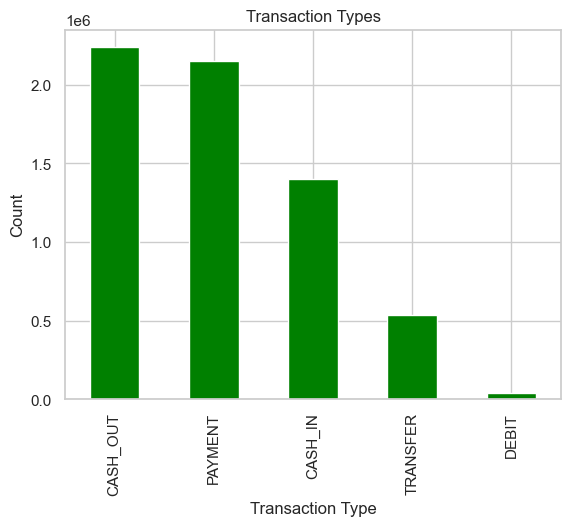

In [ ]:
# Type of transaction types and their count in descending order
df["type"].value_counts().plot(kind = "bar", title = "Transaction Types", color = "green")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

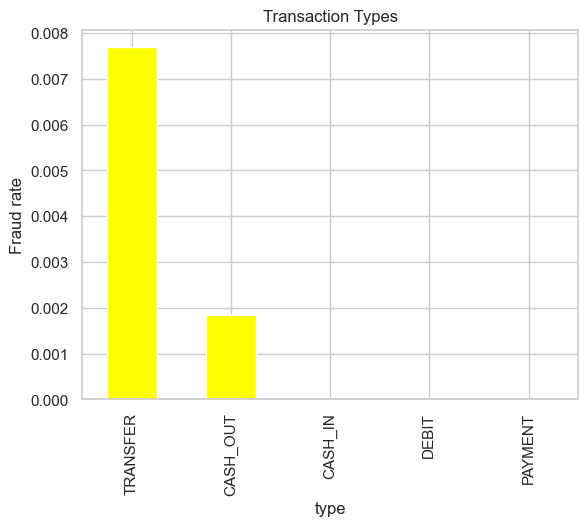

In [19]:
fraud_by_types = df.groupby("type")["isFraud"].mean().sort_values(ascending = False)
fraud_by_types.plot(kind = "bar", title = "Transaction Types", color = "yellow")
plt.ylabel("Fraud rate")
plt.show

In [23]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

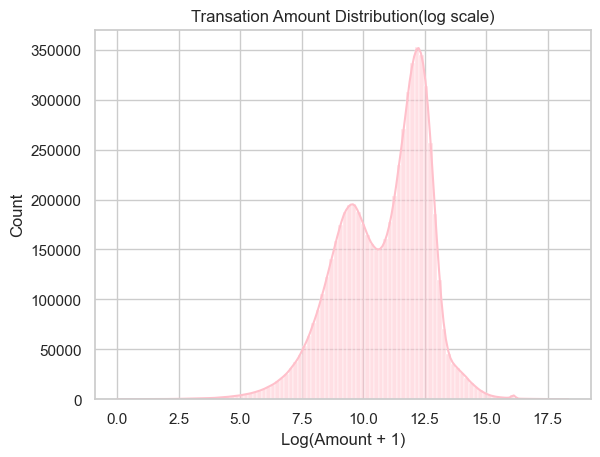

In [ ]:
# Log(Amount + 1 is used to reduce the skewness of the data)
sns.histplot(np.log1p(df["amount"]), bins = 100, kde = True, color = "pink")
plt.title("Transation Amount Distribution(log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

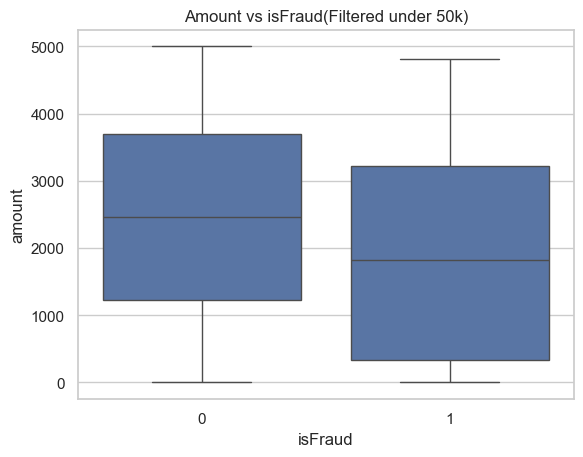

In [ ]:
sns.boxplot(data = df[df["amount"] < 5000], x = "isFraud", y = "amount")
plt.title("Amount vs isFraud(Filtered under 5K)")
plt.show

In [ ]:
# Logic: Normally the amount lost by sender should match the amount received by the receiver
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"] 
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [40]:
(df["balanceDiffOrig"] < 0).sum()


np.int64(1399253)

In [41]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [43]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balandifforig,balandiffdest,balandiffOrig,balandiffDest,balancediffOrig,balancediffDest,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,9839.64,0.0,9839.64,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1864.28,0.0,1864.28,0.0,1864.28,0.0


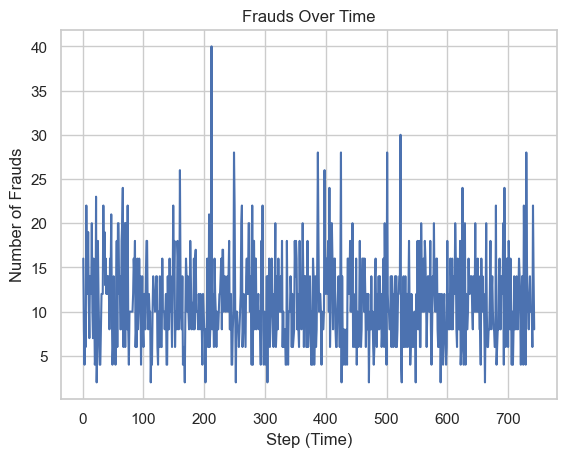

In [ ]:
# Visualized fraud over Step(time) usually One Hour 
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()


In [ ]:
# Dropped Step column
df.drop(columns="step", inplace=True)

In [47]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balandifforig,balandiffdest,balandiffOrig,balandiffDest,balancediffOrig,balancediffDest,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,9839.64,0.0,9839.64,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1864.28,0.0,1864.28,0.0,1864.28,0.0


In [48]:
top_senders = df["nameOrig"].value_counts().head(10)

In [49]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [50]:
top_receivers = df["nameDest"].value_counts().head(10)

In [51]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [ ]:
# NameOrig of fruad users with their number of frauds
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [53]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [54]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [55]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

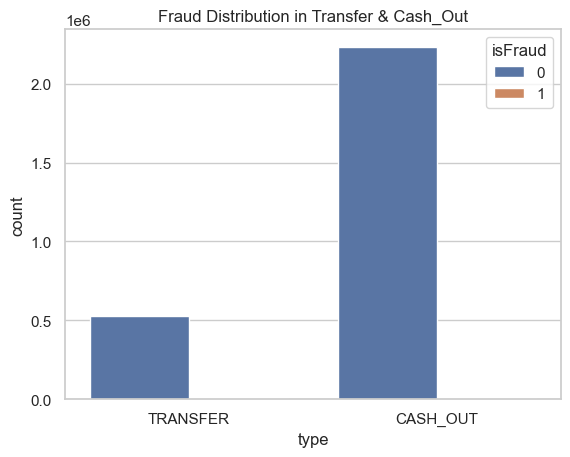

In [56]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()


In [59]:
corr = df[["amount", 'oldbalanceOrg', "newbalanceOrig", "oldbalanceDest","newbalanceDest", "isFraud"]].corr()

In [62]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


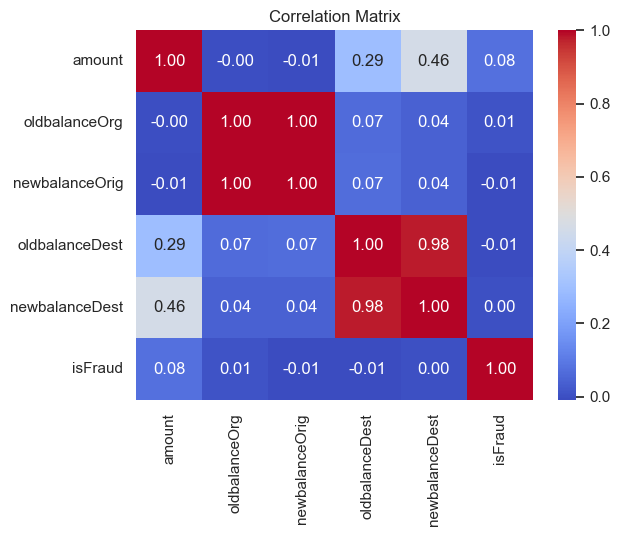

In [63]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Identifies TRANSFER and CASH_OUT transactions where the sender’s account went from having money to zero after the transaction, 
# which is often suspicious and indicative of potential fraud patterns.
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [65]:
len(zero_after_transfer)

1188074

In [66]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balandifforig,balandiffdest,balandiffOrig,balandiffDest,balancediffOrig,balancediffDest,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00,181.0,0.00,181.0,0.00,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00,181.0,-21182.00,181.0,-21182.00,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44,15325.0,46430.44,15325.0,46430.44,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00,705.0,-22425.00,705.0,-22425.00,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89,10835.0,2712905.89,10835.0,2712905.89,10835.0,2712905.89


In [67]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder      

In [ ]:
# Dropped this columns
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [70]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balandifforig,balandiffdest,balandiffOrig,balandiffDest,balancediffOrig,balancediffDest,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0,9839.64,0.0,9839.64,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0,1864.28,0.0,1864.28,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0,181.00,0.0,181.00,0.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0,181.00,-21182.0,181.00,-21182.0,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0,11668.14,0.0,11668.14,0.0,11668.14,0.0


In [ ]:
# Hot encoded the categorical variables and scaled the numerical variables
categorical = ["type"]
numerical = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [72]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [76]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [77]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [78]:
y_pred = pipeline.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



# Precision = 0.02 → Only 2% of predicted frauds are actually fraud 

# Recall = 0.94 → 94% of actual fraud transactions are correctly detected → model captures most frauds



In [80]:
confusion_matrix(y_test, y_pred)

array([[1804472,  101850],
       [    139,    2325]])

In [ ]:
# Means your model predicted correctly about 94.66% of the test transactions.
pipeline.score(X_test,y_test)*100

94.65686567273649

In [85]:
import joblib


In [86]:
joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']